In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Question 1

In [15]:
data = np.random.random((5,10))
data

array([[0.64984805, 0.35940097, 0.88655304, 0.25507549, 0.05037756,
        0.69303181, 0.7770026 , 0.66169351, 0.22056772, 0.51887483],
       [0.30047652, 0.26801767, 0.86073753, 0.72177286, 0.49787162,
        0.6561851 , 0.80421899, 0.76228511, 0.63419129, 0.88207573],
       [0.69513124, 0.72764495, 0.17423806, 0.92978954, 0.6542449 ,
        0.58446992, 0.08415512, 0.9210447 , 0.79516292, 0.19277564],
       [0.9178339 , 0.06803571, 0.47067104, 0.25923668, 0.11437591,
        0.78822128, 0.60202467, 0.60766604, 0.55857885, 0.70804633],
       [0.96548744, 0.35452358, 0.78303635, 0.11335533, 0.91169093,
        0.12431567, 0.78758856, 0.55122965, 0.80458183, 0.2312235 ]])

### Maximum absolute Scaling

In [16]:
transformation = MaxAbsScaler().fit(data)
transformation

MaxAbsScaler()

In [17]:
transformation.transform(data)

array([[0.67307768, 0.49392354, 1.        , 0.27433681, 0.05525728,
        0.87923509, 0.96615799, 0.71841628, 0.27413958, 0.58824295],
       [0.31121743, 0.36833577, 0.97088103, 0.77627552, 0.54609693,
        0.83248843, 1.        , 0.82763095, 0.78822471, 1.        ],
       [0.71997958, 1.        , 0.19653428, 1.        , 0.71761699,
        0.74150487, 0.10464204, 1.        , 0.9882934 , 0.21854772],
       [0.95064302, 0.09350125, 0.53090004, 0.27881221, 0.1254547 ,
        1.        , 0.74858302, 0.65975738, 0.6942474 , 0.8027047 ],
       [1.        , 0.48722056, 0.88323689, 0.12191504, 1.        ,
        0.15771671, 0.97932103, 0.59848305, 1.        , 0.26213565]])

### Min-Max feature scaling

In [18]:
scaling = MinMaxScaler()
print(scaling.fit(data))

MinMaxScaler()


In [19]:
print(scaling.data_max_)

[0.96548744 0.72764495 0.88655304 0.92978954 0.91169093 0.78822128
 0.80421899 0.9210447  0.80458183 0.88207573]


In [20]:
print(scaling.data_min_)

[0.30047652 0.06803571 0.17423806 0.11335533 0.05037756 0.12431567
 0.08415512 0.55122965 0.22056772 0.19277564]


In [21]:
print(scaling.transform(data))

[[0.52536209 0.44172404 1.         0.1735843  0.         0.85662199
  0.96220281 0.29870029 0.         0.47308741]
 [0.         0.30318246 0.9637583  0.74521318 0.51954849 0.80112205
  1.         0.57070542 0.70824241 1.        ]
 [0.593456   1.         0.         1.         0.70110062 0.69310191
  0.         1.         0.98387211 0.        ]
 [0.92834171 0.         0.41615435 0.17868108 0.07430321 1.
  0.71919947 0.15260709 0.57877219 0.74752738]
 [1.         0.43432968 0.85467567 0.         1.         0.
  0.97690424 0.         1.         0.05577811]]


### The z-score method

In [22]:
stats.zscore(data,axis = 1)

array([[ 0.55017617, -0.5703772 ,  1.463391  , -0.97286797, -1.7625986 ,
         0.71678042,  1.04074217,  0.59587632, -1.10599995,  0.04487765],
       [-1.63134139, -1.78786053,  1.07028092,  0.40018241, -0.67948684,
         0.08391311,  0.79774408,  0.59553563, -0.02214276,  1.17317536],
       [ 0.40072058,  0.50996346, -1.34942963,  1.18914951,  0.26334645,
         0.02890934, -1.65209951,  1.15976773,  0.73681722, -1.28714517],
       [ 1.5223067 , -1.64557969, -0.14463159, -0.93281877, -1.47283224,
         1.03913547,  0.34502984,  0.3660598 ,  0.18307204,  0.74025846],
       [ 1.28071482, -0.66193971,  0.70058321, -1.42877164,  1.10966044,
        -1.39392153,  0.71505769, -0.03648222,  0.76909043, -1.05399149]])

# Question 2

## K Nearest Neighbour

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

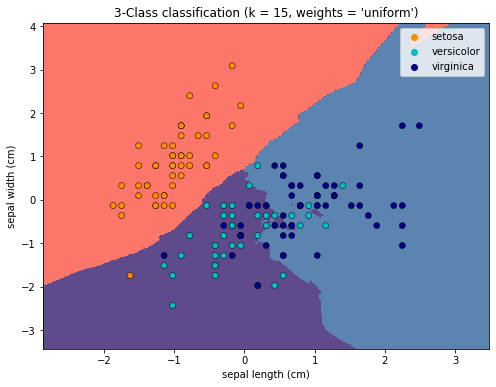

In [29]:
n_neighbors = 15
X = iris.data[:, :2]
y = iris.target
h = 0.02 
cmap_light = ListedColormap(["#FC766AFF", "#5F4B8BFF", "#5B84B1FF"])
cmap_bold = ["#5B84B1FF", "#E69A8DFF", "darkblue"]
for weights in ["uniform", "distance"]:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y], palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
plt.show()

In [25]:
# Performing Standard Scaling on the dataset
iris1 = pd.DataFrame(iris.data,columns = iris.feature_names)
std_scaler = StandardScaler()
iris1.iloc[:,[0,1,2,3]] = std_scaler.fit_transform(iris1.iloc[:,[0,1,2,3]])
iris1.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444

### Performing Min Max Normalization

In [78]:
normalizations = MinMaxScaler()
iris1.iloc[:,[0,1,2,3]] = normalizations.fit_transform(iris1.iloc[:,[0,1,2,3]])
iris1.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0           0.222222          0.625000           0.067797          0.041667
1           0.166667          0.416667           0.067797          0.041667
2           0.111111          0.500000           0.050847          0.041667
3           0.083333          0.458333           0.084746          0.041667
4           0.194444          0.666667           0.067797          0.041667

### Performing Zscore Standardization

In [79]:
stats.zscore(iris1)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 rows x 4 columns]